In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

errors1 = np.loadtxt('save/errors1.txt')
errors = np.loadtxt('save/errors.txt')
Ns = np.loadtxt('save/Ns.txt')
rcosts = np.loadtxt('save/rcosts.txt')
tcosts = np.loadtxt('save/tcosts.txt')

# $H_2$ with 16k iterations, M=1000 averages

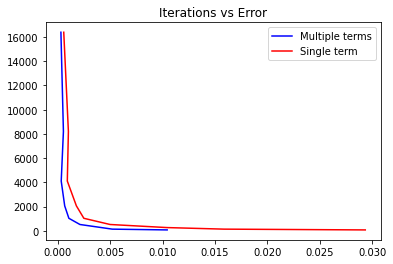

In [2]:
plt.title('Iterations vs Error')
plt.plot(errors, Ns, 'b-', label='Multiple terms', markersize=3)
plt.plot(errors1, Ns, 'r-', label='Single term', markersize=3)
plt.legend()
plt.show()

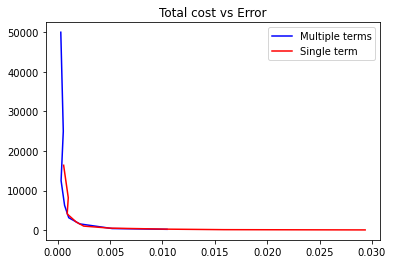

In [3]:
plt.title('Total cost vs Error')
plt.plot(errors, tcosts, 'b-', label='Multiple terms', markersize=3)
plt.plot(errors1, Ns, 'r-', label='Single term', markersize=3)
plt.legend()
plt.show()

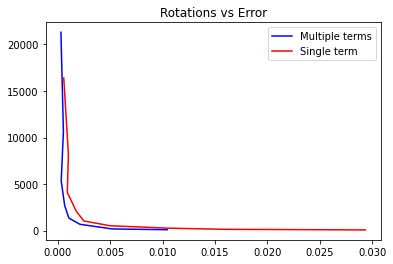

In [4]:
plt.title('Rotations vs Error')
plt.plot(errors, rcosts, 'b-', label='Multiple terms', markersize=3)
plt.plot(errors1, Ns, 'r-', label='Single term', markersize=3)
plt.legend()
plt.show()

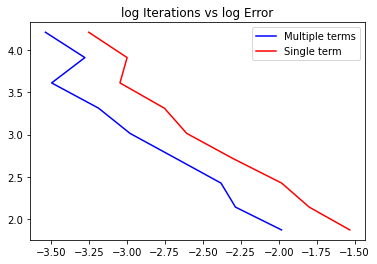

In [5]:
plt.title('log Iterations vs log Error')
plt.plot(np.log10(errors), np.log10(Ns), 'b-', label='Multiple terms', markersize=3)
plt.plot(np.log10(errors1), np.log10(Ns), 'r-', label='Single term', markersize=3)
plt.legend()
plt.show()

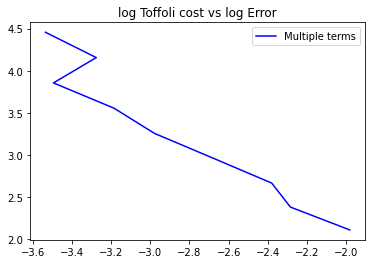

In [6]:
toffcost = tcosts - rcosts

plt.title('log Toffoli cost vs log Error')
plt.plot(np.log10(errors), np.log10(toffcost), 'b-', label='Multiple terms', markersize=3)
plt.legend()
plt.show()

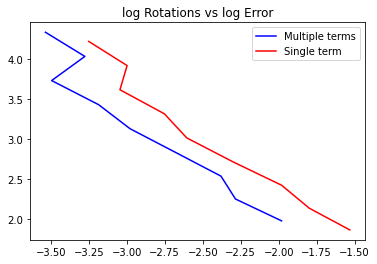

In [7]:
plt.title('log Rotations vs log Error')
plt.plot(np.log10(errors), np.log10(rcosts), 'b-', label='Multiple terms', markersize=3)
plt.plot(np.log10(errors1), np.log10(Ns), 'r-', label='Single term', markersize=3)
plt.legend()
plt.show()